In [7]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('disney-dataset.csv')

df = df.drop(['Review_ID', 'Year_Month', 'Reviewer_Location', 'Branch'], axis=1)
df = df.rename(columns={'Rating': 'rating', 'Review_Text': 'review'})

frases_lower = list()
for texto in df['review']:
    frases_lower.append(texto.lower())
df['review'] = frases_lower

df.head()

,rating,review
0,4,if you've ever been to disneyland anywhere you...
1,4,its been a while since d last time we visit hk...
2,4,thanks god it wasn t too hot or too humid wh...
3,4,hk disneyland is a great compact park. unfortu...
4,4,"the location is not in the city, took around 1..."


### QUESTÃO 1

In [3]:
from sklearn.preprocessing import FunctionTransformer

def remover_espacos_em_branco(x):
    frases = list()
    for review in x:
        review_regex = re.sub(r'\s+', ' ', review).lower()
        frases.append(review_regex.split(" "))
    return frases

ft = FunctionTransformer(remover_espacos_em_branco)

df['q1'] = ft.fit_transform(df['review'])
df.head()

,rating,review,q1
0,4,if you've ever been to disneyland anywhere you...,"[if, you've, ever, been, to, disneyland, anywh..."
1,4,its been a while since d last time we visit hk...,"[its, been, a, while, since, d, last, time, we..."
2,4,thanks god it wasn t too hot or too humid wh...,"[thanks, god, it, wasn, t, too, hot, or, too, ..."
3,4,hk disneyland is a great compact park. unfortu...,"[hk, disneyland, is, a, great, compact, park.,..."
4,4,"the location is not in the city, took around 1...","[the, location, is, not, in, the, city,, took,..."


### QUESTÃO 2

In [4]:
!pip install Unidecode
from unidecode import unidecode

def remover_caracteres_indesejados(x):
    frases = list()
    for review in x:
        review_sem_char = unidecode(review).lower()
        frases.append(review_sem_char)
    return frases

ft = FunctionTransformer(remover_caracteres_indesejados)

df['q2'] = ft.fit_transform(df['review'])
df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 740.9 kB/s eta 0:00:00a 0:00:01


,rating,review,q1,q2
0,4,if you've ever been to disneyland anywhere you...,"[if, you've, ever, been, to, disneyland, anywh...",if you've ever been to disneyland anywhere you...
1,4,its been a while since d last time we visit hk...,"[its, been, a, while, since, d, last, time, we...",its been a while since d last time we visit hk...
2,4,thanks god it wasn t too hot or too humid wh...,"[thanks, god, it, wasn, t, too, hot, or, too, ...",thanks god it wasn t too hot or too humid wh...
3,4,hk disneyland is a great compact park. unfortu...,"[hk, disneyland, is, a, great, compact, park.,...",hk disneyland is a great compact park. unfortu...
4,4,"the location is not in the city, took around 1...","[the, location, is, not, in, the, city,, took,...","the location is not in the city, took around 1..."


### QUESTÃO 3

In [5]:
bins = [0, 2, 3, 5]
labels = ['Ruim', 'Neutro', 'Bom']

df['q3'] = pd.cut(df['rating'], bins=bins, labels=labels, right=False)
df.head()

,rating,review,q1,q2,q3
0,4,if you've ever been to disneyland anywhere you...,"[if, you've, ever, been, to, disneyland, anywh...",if you've ever been to disneyland anywhere you...,Bom
1,4,its been a while since d last time we visit hk...,"[its, been, a, while, since, d, last, time, we...",its been a while since d last time we visit hk...,Bom
2,4,thanks god it wasn t too hot or too humid wh...,"[thanks, god, it, wasn, t, too, hot, or, too, ...",thanks god it wasn t too hot or too humid wh...,Bom
3,4,hk disneyland is a great compact park. unfortu...,"[hk, disneyland, is, a, great, compact, park.,...",hk disneyland is a great compact park. unfortu...,Bom
4,4,"the location is not in the city, took around 1...","[the, location, is, not, in, the, city,, took,...","the location is not in the city, took around 1...",Bom


### QUESTÃO 4

In [8]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(df['review'])
print(bag_of_words.shape)

(42656, 42554)


### QUESTÃO 5

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df['review'])
print(bag_of_words.shape)

(42656, 50)


### QUESTÃO 6

In [10]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 3.3 MB/s eta 0:00:00a 0:00:01


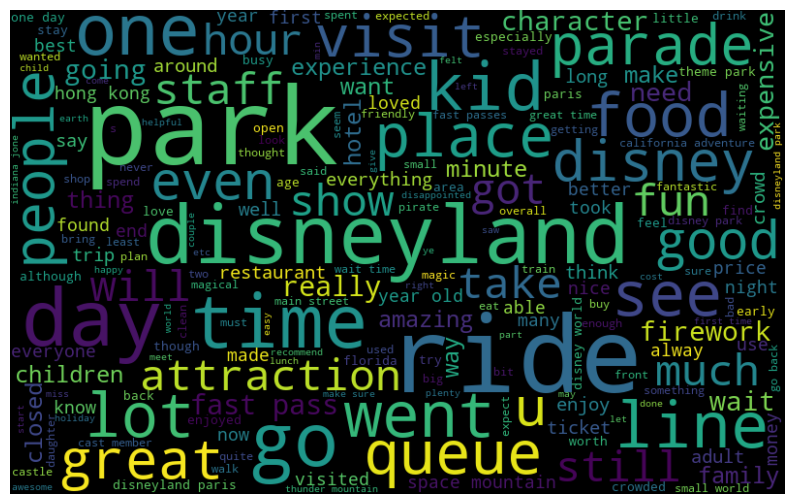

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

todas_palavras = ' '.join([texto for texto in df['review']])
len(todas_palavras)
nuvem_palavras = WordCloud(width=800, height= 500, max_font_size=110).generate(todas_palavras)

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

### QUESTÃO 7

### QUESTÃO 8 e 9

In [12]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.0/785.0 kB 5.0 MB/s eta 0:00:00a 0:00:01


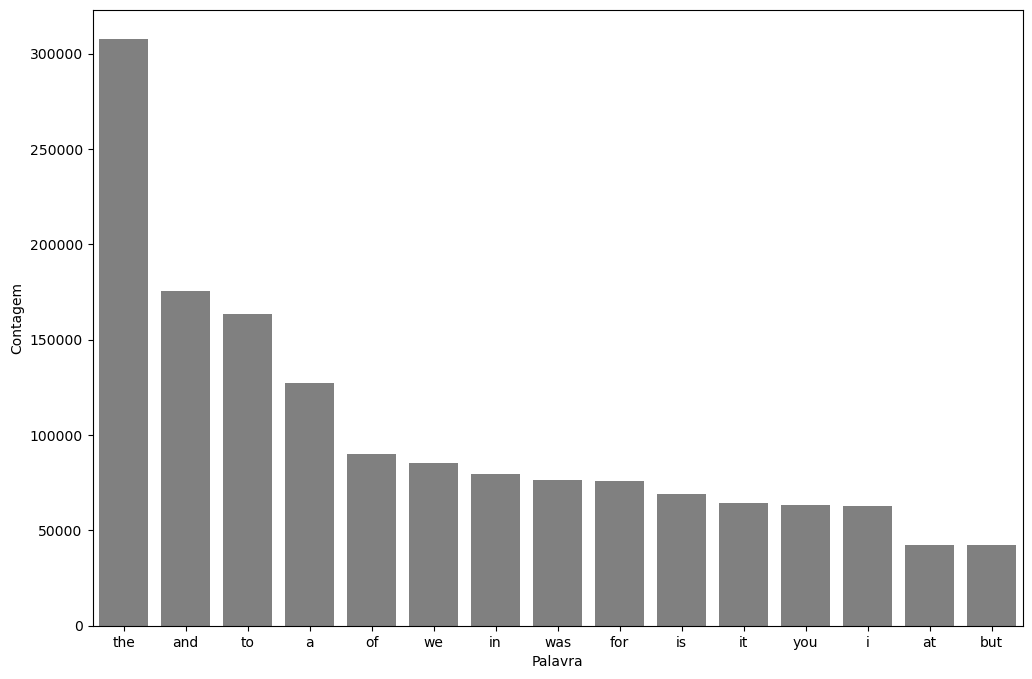

In [13]:
import nltk
from nltk import tokenize
import seaborn as sns

token_espaco = tokenize.WhitespaceTokenizer()

def tokenizer(df, coluna, quantidade):
    todas_palavras = ' '.join([texto for texto in df[coluna]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

tokenizer(df, 'review', 15)

### QUESTÃO 10

In [14]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package name

True

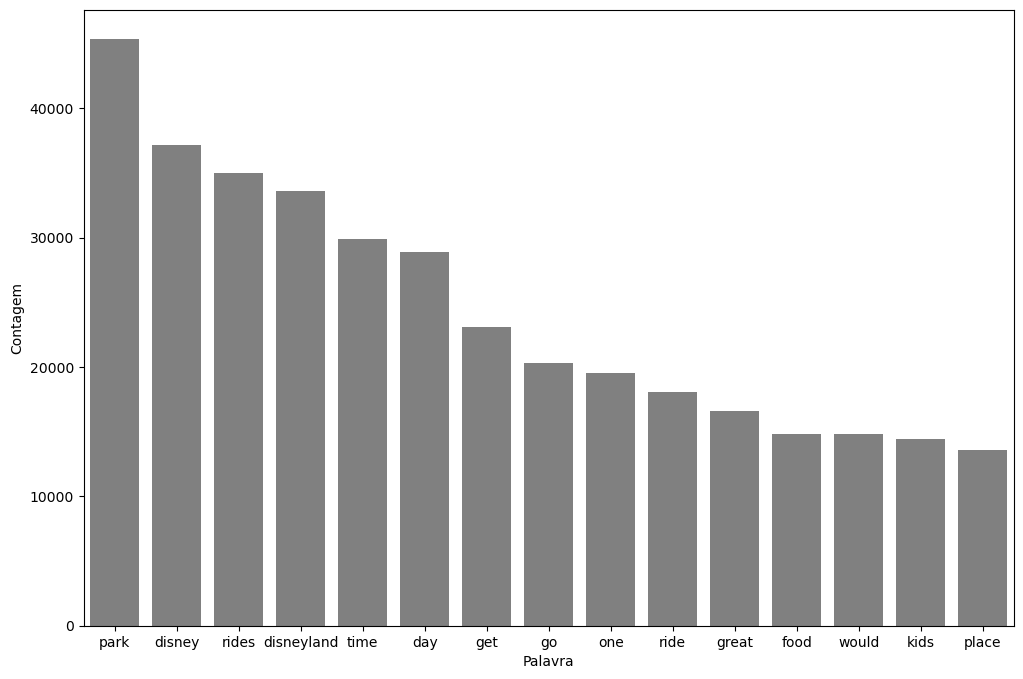

In [18]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
    
palavras_irrelevantes = nltk.corpus.stopwords.words("english") + pontuacao

token_pontuacao = tokenize.WordPunctTokenizer()

frase_processada = list()
for texto in df['review']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(texto)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
df["q10"] = frase_processada

tokenizer(df, 'q10', 15)

In [19]:
df.head()

,rating,review,q1,q2,q3,q10
0,4,if you've ever been to disneyland anywhere you...,"[if, you've, ever, been, to, disneyland, anywh...",if you've ever been to disneyland anywhere you...,Bom,ever disneyland anywhere find disneyland hong ...
1,4,its been a while since d last time we visit hk...,"[its, been, a, while, since, d, last, time, we...",its been a while since d last time we visit hk...,Bom,since last time visit hk disneyland .. yet tim...
2,4,thanks god it wasn t too hot or too humid wh...,"[thanks, god, it, wasn, t, too, hot, or, too, ...",thanks god it wasn t too hot or too humid wh...,Bom,thanks god hot humid visiting park otherwise w...
3,4,hk disneyland is a great compact park. unfortu...,"[hk, disneyland, is, a, great, compact, park.,...",hk disneyland is a great compact park. unfortu...,Bom,hk disneyland great compact park unfortunately...
4,4,"the location is not in the city, took around 1...","[the, location, is, not, in, the, city,, took,...","the location is not in the city, took around 1...",Bom,location city took around 1 hour kowlon kids l...
